# Dropout

Overfitting relies on memorizing specific, non-generalizable patterns. It learns too specific a combination of weights.

*Dropout* randomly takes away a fraction of a layer's inputs, forcing the model to learn a more general pattern.

This creates a number of smaller networks that may each make mistakes but are generally right about the same things.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

2024-01-30 01:33:05.283983: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# implementing a dropout layer

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[3]),
    layers.Dropout(rate=0.3), # dropout layers goes before the layer it will be implemented on
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

# Batch Normalization

*Batch normalization ("batchnorm")* helps correct training that is slow or unstable.

<br/>

It's good to put all data (pre-processing) on the same scale - perhaps with scikit-learn's StandardScaler or MinMaxScaler. This is because SGD will shift the weights in proportion to how large the activation is. Therefore, having data on the same scale normalizes the activations.

However, it's also a good idea to normalize data inside the model. The batch normalization layer does this.

<br/>

Batch normalization layers look at each batch as they come in. It first normalizes the batch with its own mean and standard deviation. It then puts the data on a new scale. 

<br/>

Batchnorm usually aids the optimization process. Models with batchnorm tend to need fewer epochs to train.

In [3]:
# the batchnorm layer can come in anywhere

model_one = keras.Sequential([
    layers.BatchNormalization(), # adding as a first layer as a kind of 'adaptive preprocessor' in place of scikit-learn's StandardScalar
    layers.Dense(512, input_shape=[3]),
    layers.Dense(1)
])

model_two = keras.Sequential([
    layers.Dense(512, input_shape=[3]),
    layers.BatchNormalization(), # adding in between layer and activation layer
    layers.Activation('relu'),
    layers.Dense(1)
])

model_three = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[3]),
    layers.BatchNormalization(), # adding after a layer
    layers.Dense(1)
])

# Practice

In [4]:
# import data
red_wine = pd.read_csv('./red-wine.csv')

In [5]:
# split into train and valid
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

In [6]:
# normalize
# min_ = df_train.min(axis=0)
# max_ = df_train.max(axis=0)
# df_train_normal = (df_train - min_) / (min_ + max_)
# df_valid_normal = (df_valid - min_) / (min_ + max_)

In [7]:
# split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [8]:
# create the model
features_size = [df_train.shape[1] - 1]

model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu', input_shape=features_size),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

In [9]:
# building a model with dropout and batchnorm
model_two = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [10]:
# create early stopping callback
early_stop = EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

In [11]:
# compile the model (optimizer and loss)
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

Minimum validation loss: 0.4800802171230316


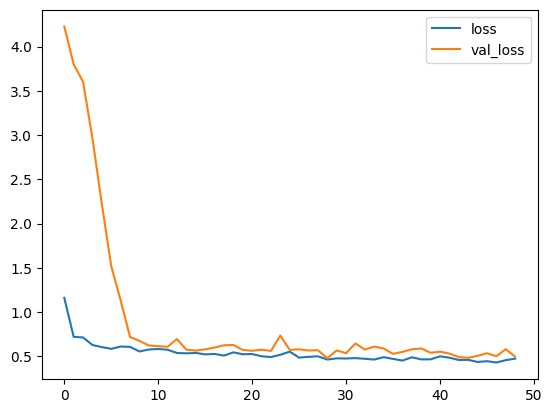

In [12]:
# train the model (callback)
history = model.fit(
    X_train, y_train,
    validation_data = [X_valid, y_valid],
    batch_size = 20,
    epochs = 500,
    callbacks = [early_stop],
    verbose = 0
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print(f"Minimum validation loss: {history_df['val_loss'].min()}")

In [ ]:
i